# Day082
## 訓練神經網路的細節與技巧 - Regularization
### Cost function = Loss + Regularization
- 透過 regularization, 可以使的模型的weights 變得比較小
- $w_i$ 較小 ➔ $\Delta x_i$ 對 $\hat{y}$ 造成的影響 $\Delta \hat{y}$ 較小 ➔ 對 input 變化比較不敏感 ➔ better generalization

詳細參考[Machine Learning Explained: Regularization](http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/)

## Work
請比較使用 L1, L2, 混合L1_L2 regularization及不同比例下的訓練結果

In [1]:
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_nurons=[512, 256, 128], regularizer=l1, reg_ratio=0.01):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, nurons in enumerate(num_nurons):
        if i == 0:
            x = keras.layers.Dense(units=nurons, 
                                   activation='relu',
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizer(reg_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=nurons,
                                  activation='relu',
                                   name="hidden_layer"+str(i+1), 
                                  kernel_regularizer=regularizer(reg_ratio))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

### L1 - Lasso regularization

In [7]:
results = {}
"""
Set your training loop
"""

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with Regulizer = {regulizer_ratio}")
    model = build_mlp(input_shape=x_train.shape[1:], regularizer=l1, reg_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-l1-{regulizer_ratio}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.01
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:


50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - acc: 0.0986 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with Regulizer = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None,

50000/50000 [==============================] - 2s 47us/step - loss: 2.6825 - acc: 0.6238 - val_loss: 2.9307 - val_acc: 0.5355
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.6460 - acc: 0.6242 - val_loss: 2.8998 - val_acc: 0.5293
Experiment with Regulizer = 1e-08
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)   

50000/50000 [==============================] - 3s 53us/step - loss: 0.8692 - acc: 0.6956 - val_loss: 1.4034 - val_acc: 0.5291
Experiment with Regulizer = 1e-12
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________________

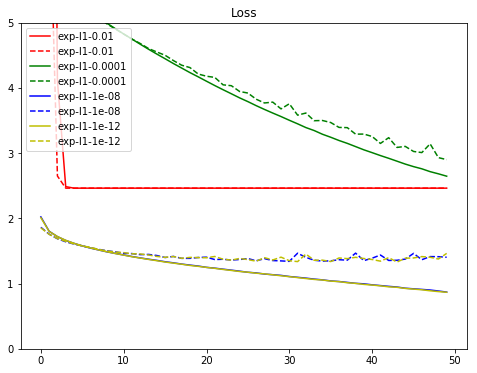

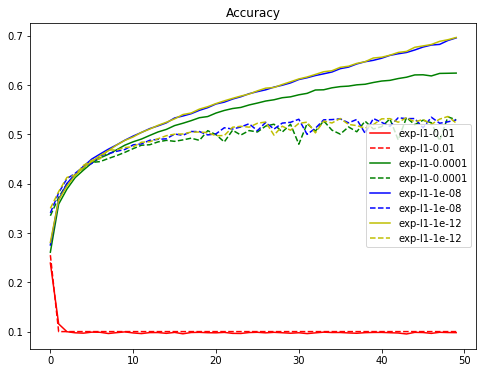

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
plot the results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L2 - Ridge Regularization

In [9]:
results = {}
"""
Set your training loop
"""

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with Regulizer = {regulizer_ratio}")
    model = build_mlp(input_shape=x_train.shape[1:], regularizer=l2, reg_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-l2-{regulizer_ratio}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1737 - acc: 0.2716 - val_loss: 2.0165 - val_acc: 0.3389
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.9474 - acc: 0.3643 - val_loss: 1.9044 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8648 - acc: 0.3929 - val_loss: 1.8325 - val_acc: 0.4059
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8053 - acc: 0.4151 - val_loss: 1.7845 - val_acc: 0.4239
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7593 - acc: 0.4328 - val_loss: 1.7409 - val_acc: 0.4370
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7220 - acc: 0.4452 - val_loss: 1.7323 - val_acc: 0.4367
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6899 - acc: 0.4556 - val_loss: 1.6983 - val_acc

50000/50000 [==============================] - 2s 50us/step - loss: 1.8227 - acc: 0.3588 - val_loss: 1.7870 - val_acc: 0.3758
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7342 - acc: 0.3927 - val_loss: 1.7099 - val_acc: 0.3978
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6723 - acc: 0.4134 - val_loss: 1.6481 - val_acc: 0.4171
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6252 - acc: 0.4306 - val_loss: 1.6304 - val_acc: 0.4299
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5865 - acc: 0.4427 - val_loss: 1.5747 - val_acc: 0.4474
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5544 - acc: 0.4553 - val_loss: 1.5494 - val_acc: 0.4525
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5258 - acc: 0.4636 - val_loss: 1.5519 - val_acc: 0.4518
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 46us/step - loss: 1.7319 - acc: 0.3954 - val_loss: 1.7000 - val_acc: 0.4029
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6730 - acc: 0.4133 - val_loss: 1.6579 - val_acc: 0.4167
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6256 - acc: 0.4306 - val_loss: 1.6187 - val_acc: 0.4323
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5867 - acc: 0.4438 - val_loss: 1.6104 - val_acc: 0.4238
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5529 - acc: 0.4542 - val_loss: 1.5583 - val_acc: 0.4499
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5221 - acc: 0.4640 - val_loss: 1.5271 - val_acc: 0.4583
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4937 - acc: 0.4752 - val_loss: 1.5260 - val_acc: 0.4544
Epoch 10/50
50000/50000 [===========================

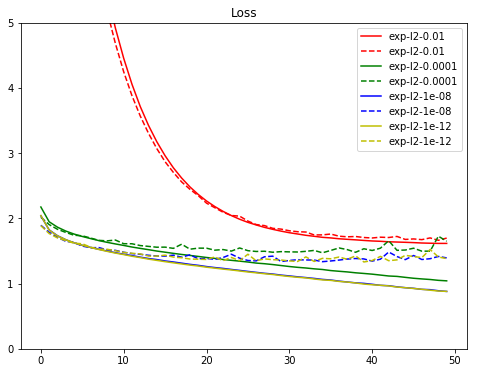

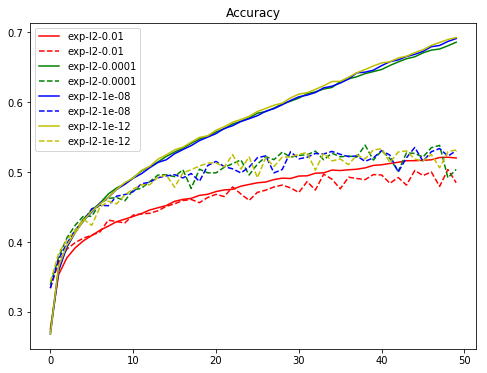

In [10]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L1_L2 - Elastic Net

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation


results = {}
"""
Set your training loop
"""

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with Regulizer = {regulizer_ratio}")
    
    model = Sequential([
    Dense(512, input_shape=x_train.shape[1:], kernel_regularizer=l1_l2(l1=regulizer_ratio, l2=regulizer_ratio)),
    Activation('relu'),
    Dense(256, kernel_regularizer=l1_l2(l1=regulizer_ratio, l2=regulizer_ratio)),
    Activation('relu'),
    Dense(128, kernel_regularizer=l1_l2(l1=regulizer_ratio, l2=regulizer_ratio)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    ])
    
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-l1_l2-{regulizer_ratio}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)    

50000/50000 [==============================] - 2s 49us/step - loss: 2.4614 - acc: 0.0986 - val_loss: 2.4614 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.4614 - acc: 0.0976 - val_loss: 2.4614 - val_acc: 0.1000
Experiment with Regulizer = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128) 

Epoch 48/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.6848 - acc: 0.6225 - val_loss: 2.9238 - val_acc: 0.5353
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.6486 - acc: 0.6222 - val_loss: 2.8689 - val_acc: 0.5345
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.6129 - acc: 0.6231 - val_loss: 2.9046 - val_acc: 0.5195
Experiment with Regulizer = 1e-08
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation

Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9204 - acc: 0.6773 - val_loss: 1.4083 - val_acc: 0.5252
Epoch 48/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9030 - acc: 0.6820 - val_loss: 1.5224 - val_acc: 0.5010
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8860 - acc: 0.6913 - val_loss: 1.3817 - val_acc: 0.5315
Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8793 - acc: 0.6922 - val_loss: 1.3883 - val_acc: 0.5348
Experiment with Regulizer = 1e-12
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)   

Epoch 46/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9273 - acc: 0.6760 - val_loss: 1.4104 - val_acc: 0.5225
Epoch 47/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9117 - acc: 0.6798 - val_loss: 1.4629 - val_acc: 0.5056
Epoch 48/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.9001 - acc: 0.6859 - val_loss: 1.3842 - val_acc: 0.5336
Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8987 - acc: 0.6847 - val_loss: 1.3709 - val_acc: 0.5346
Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8783 - acc: 0.6928 - val_loss: 1.4032 - val_acc: 0.5348


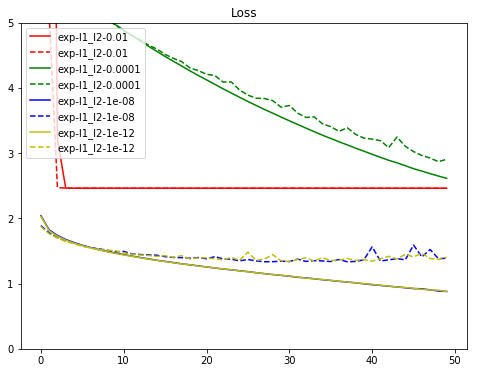

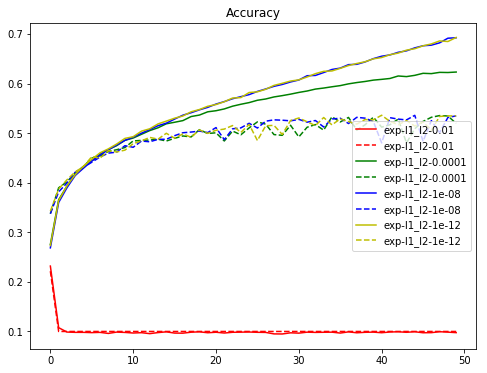

In [12]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()